In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Retail%20Store%20Sales%20Transactions%20(Scanner%20Data)/scanner_data.csv")
df.head(10)

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
5,6,02/01/2016,5010,6,JPI,GVBRC,1.0,10.77
6,7,02/01/2016,1666,7,XG4,AHAE7,1.0,3.65
7,8,02/01/2016,1666,7,FEW,AHZNS,1.0,8.21
8,9,02/01/2016,1253,8,0H2,9STQJ,1.0,8.25
9,10,02/01/2016,5541,9,N5F,7IE9S,1.0,8.18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [5]:
df['DateTime']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      131706 non-null  int64         
 1   Date            131706 non-null  object        
 2   Customer_ID     131706 non-null  int64         
 3   Transaction_ID  131706 non-null  int64         
 4   SKU_Category    131706 non-null  object        
 5   SKU             131706 non-null  object        
 6   Quantity        131706 non-null  float64       
 7   Sales_Amount    131706 non-null  float64       
 8   DateTime        131706 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 9.0+ MB


In [6]:
df.nunique()

Unnamed: 0        131706
Date                 363
Customer_ID        22625
Transaction_ID     64682
SKU_Category         187
SKU                 5242
Quantity              83
Sales_Amount        3233
DateTime             363
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485311,11.981524
std,38020.391614,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


In [8]:
group = df.groupby(['DateTime','Customer_ID','Transaction_ID']).Sales_Amount.sum().reset_index()
group.sort_values(by=['Transaction_ID']).head(10)

,DateTime,Customer_ID,Transaction_ID,Sales_Amount
4962,2016-02-01,2547,1,3.13
4935,2016-02-01,822,2,5.46
4981,2016-02-01,3686,3,6.35
4983,2016-02-01,3719,4,5.59
5063,2016-02-01,9200,5,6.88
5008,2016-02-01,5010,6,10.77
4948,2016-02-01,1666,7,11.86
4940,2016-02-01,1253,8,8.25
5016,2016-02-01,5541,9,14.53
5047,2016-02-01,7548,10,7.49


In [9]:
group.head()

,DateTime,Customer_ID,Transaction_ID,Sales_Amount
0,2016-01-02,37,4938,2.49
1,2016-01-02,50,5004,2.86
2,2016-01-02,91,4976,5.79
3,2016-01-02,106,4885,9.06
4,2016-01-02,159,4879,44.55


In [10]:
print('Min:{}; Max:{}'.format(min(group.DateTime),max(group.DateTime)))

Min:2016-01-02 00:00:00; Max:2016-12-31 00:00:00


In [11]:
import datetime

In [12]:
snapshot_day = max(group.DateTime) + datetime.timedelta(days=1)
snapshot_day 

Timestamp('2017-01-01 00:00:00')

In [14]:
datamart = group.groupby('Customer_ID').agg({
    'DateTime': lambda x:(snapshot_day - x.max()).days,
    'Transaction_ID' : 'count',
    'Sales_Amount':'sum'
})

datamart.rename(columns = {'DateTime':'Recency',
                          'Transaction_ID':'Frequency',
                          'Sales_Amount':'MonetaryValue'}, inplace=True)
datamart.head()

,Recency,Frequency,MonetaryValue
Customer_ID,,,
1,345,1,16.29
2,196,2,22.77
3,335,1,10.92
4,55,2,33.29
5,121,5,78.82


In [16]:
r_labels = range(4,0,-1)

datamart_quartile = datamart.copy(deep=True)
datamart_quartile['R']= pd.qcut(datamart['Recency'],4, labels = r_labels)
datamart_quartile.head()

,Recency,Frequency,MonetaryValue,R
Customer_ID,,,,
1,345,1,16.29,1
2,196,2,22.77,2
3,335,1,10.92,1
4,55,2,33.29,3
5,121,5,78.82,3


In [17]:
f_labels = range(1,3)
datamart_quartile['F']= pd.qcut(datamart['Frequency'],4, labels = f_labels, duplicates='drop')

m_labels = range(1,5)
datamart_quartile['M']= pd.qcut(datamart['MonetaryValue'],4, labels = m_labels)

datamart_quartile.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer_ID,,,,,,
1,345,1,16.29,1,1,2
2,196,2,22.77,2,1,2
3,335,1,10.92,1,1,2
4,55,2,33.29,3,1,3
5,121,5,78.82,3,2,4


In [18]:
datamart_quartile.describe(include='all')  

,Recency,Frequency,MonetaryValue,R,F,M
count,22625.000000,22625.000000,22625.000000,22625.0,22625.0,22625.0
unique,NaN,NaN,NaN,4.0,2.0,4.0
top,NaN,NaN,NaN,4.0,1.0,1.0
freq,NaN,NaN,NaN,5703.0,17823.0,5657.0
mean,145.408796,2.858873,69.747563,NaN,NaN,NaN
std,109.263227,4.000157,152.307769,NaN,NaN,NaN
min,1.000000,1.000000,0.140000,NaN,NaN,NaN
25%,45.000000,1.000000,10.170000,NaN,NaN,NaN
50%,121.000000,1.000000,23.850000,NaN,NaN,NaN
75%,243.000000,3.000000,63.070000,NaN,NaN,NaN


In [19]:
def join_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])

datamart_quartile['RFM_Segment'] = datamart_quartile.apply(join_rfm, axis=1)
datamart_quartile['RFM_Score'] = datamart_quartile[['R']+['F']+['M']].sum(axis=1)

datamart_quartile.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer_ID,,,,,,,,
1,345,1,16.29,1,1,2,1.01.02.0,4
2,196,2,22.77,2,1,2,2.01.02.0,5
3,335,1,10.92,1,1,2,1.01.02.0,4
4,55,2,33.29,3,1,3,3.01.03.0,7
5,121,5,78.82,3,2,4,3.02.04.0,9


In [20]:
datamart_quartile.groupby('RFM_Segment').size().sort_values(ascending=False).head(15)

RFM_Segment
4.02.04.0    2234
1.01.01.0    2072
1.01.02.0    1724
2.01.01.0    1647
2.01.02.0    1593
3.01.02.0    1350
2.01.03.0    1321
3.01.01.0    1238
3.01.03.0    1216
1.01.03.0    1101
4.01.03.0     976
3.02.04.0     928
4.01.02.0     892
4.01.01.0     698
3.01.04.0     548
dtype: int64

In [22]:
datamart_quartile[datamart_quartile['RFM_Segment']=='111'][:5]

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer_ID,,,,,,,,


In [24]:
datamart_quartile.groupby('RFM_Score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(1) 

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           303.7       1.0           6.0  2072
4           245.8       1.1          11.0  3371
5           184.1       1.3          19.0  3941
6           135.3       1.6          36.9  3939
7            94.6       2.2          53.9  2991
8            69.6       3.1          84.0  2281
9            50.1       5.4         144.9  1796
10           18.7      10.7         311.3  2234

In [25]:
def segment_me(df):
    if df['RFM_Score'] >=9:
        return 'Gold'
    elif (df['RFM_Score']>=6) and (df['RFM_Score']<9):
        return 'Silver'
    else:
        return 'Bronze'

In [26]:
datamart_quartile['General_Segment']=datamart_quartile.apply(segment_me,axis=1)
datamart_quartile.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
Customer_ID,,,,,,,,,
1,345,1,16.29,1,1,2,1.01.02.0,4,Bronze
2,196,2,22.77,2,1,2,2.01.02.0,5,Bronze
3,335,1,10.92,1,1,2,1.01.02.0,4,Bronze
4,55,2,33.29,3,1,3,3.01.03.0,7,Silver
5,121,5,78.82,3,2,4,3.02.04.0,9,Gold


In [27]:
datamart_quartile.groupby('General_Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(1).sort_values(('Recency','mean'),ascending=True)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Gold               32.7       8.3         237.1  4030
Silver            105.8       2.2          54.1  9211
Bronze            232.7       1.2          13.2  9384

In [28]:
datamart.describe() 

,Recency,Frequency,MonetaryValue
count,22625.000000,22625.000000,22625.000000
mean,145.408796,2.858873,69.747563
std,109.263227,4.000157,152.307769
min,1.000000,1.000000,0.140000
25%,45.000000,1.000000,10.170000
50%,121.000000,1.000000,23.850000
75%,243.000000,3.000000,63.070000
max,365.000000,99.000000,3985.940000


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

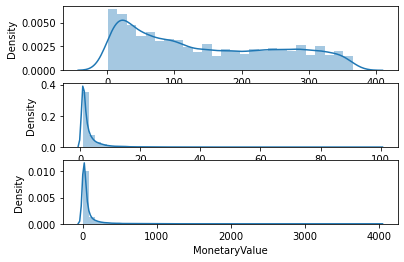

In [29]:
plt.subplot(3,1,1); sns.distplot(datamart['Recency'])
plt.subplot(3,1,2); sns.distplot(datamart['Frequency'])
plt.subplot(3,1,3); sns.distplot(datamart['MonetaryValue'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

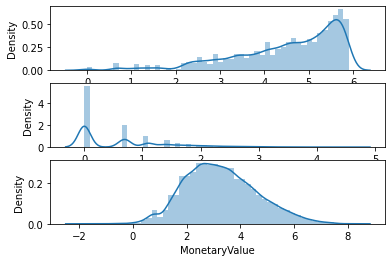

In [30]:
datamart_log = np.log(datamart)
plt.subplot(3,1,1); sns.distplot(datamart_log['Recency'])
plt.subplot(3,1,2); sns.distplot(datamart_log['Frequency'])
plt.subplot(3,1,3); sns.distplot(datamart_log['MonetaryValue'])
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log) 

StandardScaler()

In [32]:
datamart_normalized = scaler.transform(datamart_log)
datamart_normalized = pd.DataFrame(data=datamart_normalized, 
                                    index=datamart.index, 
                                    columns=datamart.columns)

datamart_normalized.head()

,Recency,Frequency,MonetaryValue
Customer_ID,,,
1,1.119616,-0.800890,-0.368568
2,0.648626,0.071746,-0.115912
3,1.095115,-0.800890,-0.670309
4,-0.409904,0.071746,0.170634
5,0.246862,1.225308,0.820891


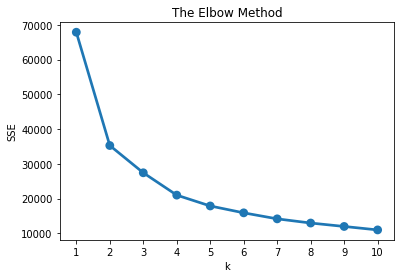

In [33]:
from sklearn.cluster import KMeans
sse = {}

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_
    
    
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [34]:

kmeans2 = KMeans(n_clusters=2, random_state=1)
kmeans2.fit(datamart_normalized)
cluster_labels_k2 = kmeans2.labels_

datamart_rfm_k2 = datamart.assign(Cluster = cluster_labels_k2)
datamart_rfm_k2

,Recency,Frequency,MonetaryValue,Cluster
Customer_ID,,,,
1,345,1,16.29,0
2,196,2,22.77,0
3,335,1,10.92,0
4,55,2,33.29,0
5,121,5,78.82,1
...,...,...,...,...
22621,81,1,9.69,0
22622,16,1,6.07,0
22623,11,1,128.01,1
